#Q1

In [ ]:
import numpy as np
import scipy as sc
from scipy import signal
from scipy.fft import fft
from scipy.fft import ifft
import math
import cmath
import matplotlib.pyplot as plt

<ipython-input-172-13cc4c842979>:32: ComplexWarning: Casting complex values to real discards the imaginary part
  y[0:16] = y1[0:16]
<ipython-input-172-13cc4c842979>:35: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i] = y[i] + y2[0]
<ipython-input-172-13cc4c842979>:37: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i] = y[i] + y2[1]
<ipython-input-172-13cc4c842979>:39: ComplexWarning: Casting complex values to real discards the imaginary part
  y[16:30] = y2[2:16]
<ipython-input-172-13cc4c842979>:42: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i] = y[i] + y3[0]
<ipython-input-172-13cc4c842979>:44: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i] = y[i] + y3[1]
<ipython-input-172-13cc4c842979>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  y[30:44] = y3[2:16]
<ipython-input-172-13cc4c842979>:49: ComplexWarning: Casting co

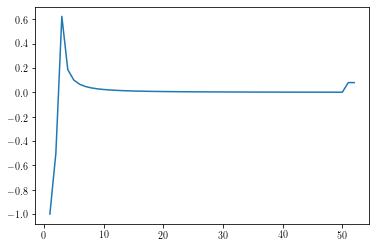

In [ ]:
n = list(range(50))

x = np.zeros(50)

for i in range(50):
  x[i]=((math.factorial(2 * i) * math.pow(1/4, i)) / (math.factorial(i) ** 2))
x1 = np.zeros(16)
x2 = np.zeros(16)
x3 = np.zeros(16)
x4 = np.zeros(16)
h = np.zeros(16)
x1[0:14] = x[0:14]
x2[0:14] = x[14:28]
x3[0:14] = x[28:42]
x4[0:8] = x[42:50]
h[0] = -1
h[1] = 0
h[2] = 1

X1 = fft(x1)
X2 = fft(x2)
X3 = fft(x3)
X4 = fft(x4)
H = fft(h)

y1 = ifft(np.multiply(X1,H))
y2 = ifft(np.multiply(X2,H))
y3 = ifft(np.multiply(X3,H))
y4 = ifft(np.multiply(X4,H))

y = np.zeros(58)
y[0:16] = y1[0:16]
for i in range(14,16):
  if i == 14:
    y[i] = y[i] + y2[0]
  else:
    y[i] = y[i] + y2[1]

y[16:30] = y2[2:16]
for i in range(28,30):
  if i == 28:
    y[i] = y[i] + y3[0]
  else:
    y[i] = y[i] + y3[1]

y[30:44] = y3[2:16]
for i in range(42,44):
  if i == 42:
    y[i] = y[i] + y4[0]
  else:
    y[i] = y[i] + y4[1]

y[44:58] = y4[2:16]
y_final = y[0:52]
x = np.arange(1, len(y_final) + 1)
plt.plot(x,y_final)
plt.show()

#Q2

In [ ]:
import numpy as np
import scipy as sc
from scipy import signal
import math
import cmath
import matplotlib.pyplot as plt
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
plt.rcParams['text.usetex'] = True

In [ ]:
Omega_s= 240
Omega_width = 10
Omega_cutoff = np.array([40, 85])
ripple = 50
width = 2*Omega_width/Omega_s
F_cutoff_norm = np.multiply(Omega_cutoff,2/Omega_s)

In [ ]:
M, beta = signal.kaiserord(ripple, width)
M=M+1
window_coeff = signal.windows.kaiser(M, beta)
filter_coeff = signal.firwin(M, F_cutoff_norm, window = ('kaiser', beta), pass_zero=True)
w, h = signal.freqz(filter_coeff, worN=10000)
w *=Omega_s/2/math.pi
mag_response = 20*np.log10(abs(h))

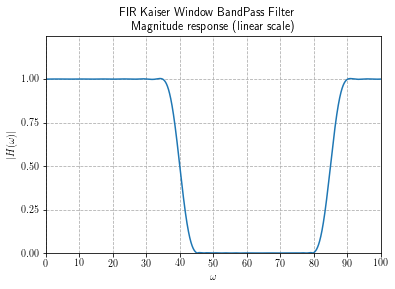

In [ ]:
plt.plot(w,abs(h))
plt.axis([0, 100, 0, 1.25])
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(\omega)|$')
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(0,1.25,0.25))
plt.title('Magnitude response (linear scale)')
plt.grid(linestyle='dashed')
plt.suptitle('FIR Kaiser Window BandPass Filter')
plt.show()

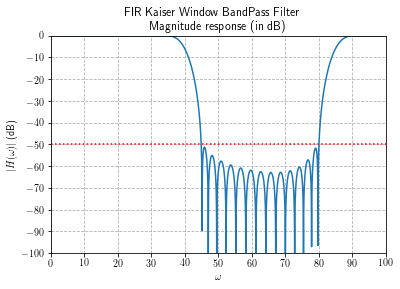

In [ ]:
plt.plot(w,mag_response)
plt.axis([0, 100, -100, 0])
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(\omega)|$ (dB)')
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(-100,10,10))
plt.hlines(-50, 0, 100, 'r', 'dotted')
plt.title('Magnitude response (in dB)')
plt.grid(linestyle='dashed')
plt.suptitle('FIR Kaiser Window BandPass Filter')
plt.show() 

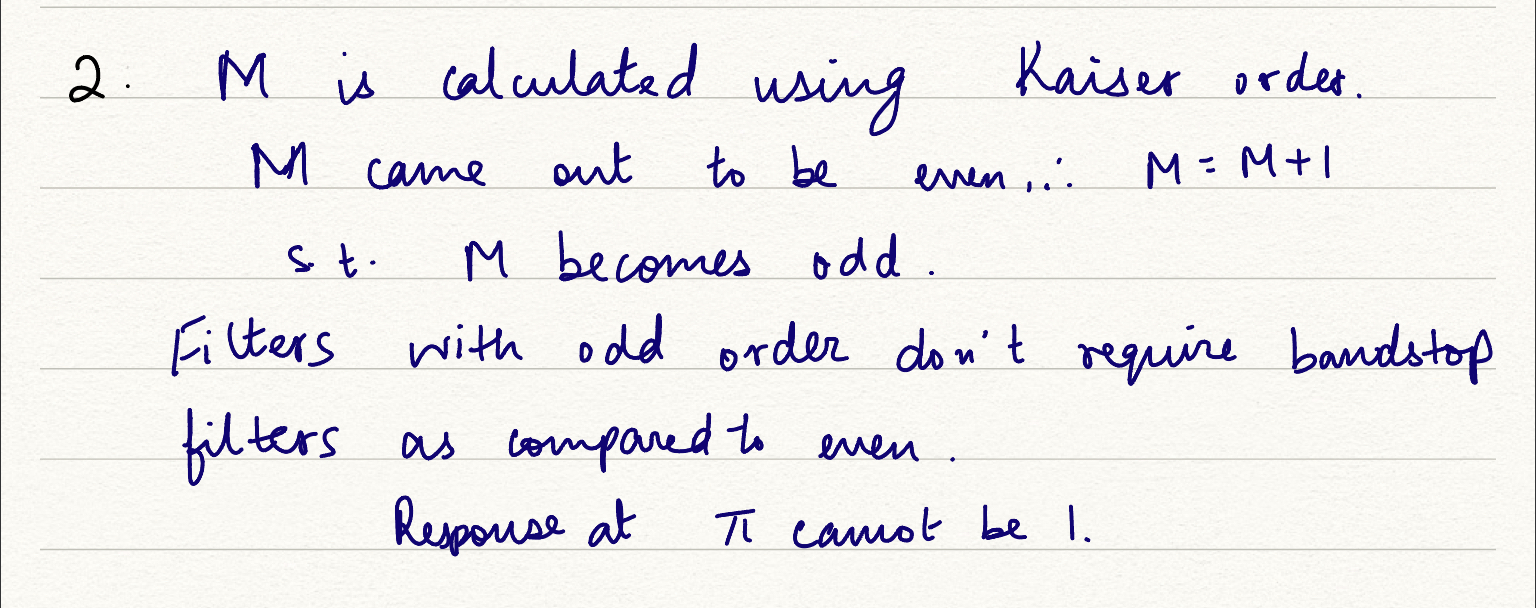

#Q3

In [ ]:
import numpy as np
import scipy as sc
from scipy import signal
import math
import cmath
import matplotlib.pyplot as plt

Omega_s=400
Omega_p = np.array([0,20,140,160])
Omega_stop = np.array([60,100,180,200])

#Calculating ripples for the weight
stop_ripple_db = 30
pass_ripple_db = 20
stop_ripple = 10**(-stop_ripple_db/20)
pass_ripple = 10**(-pass_ripple_db/20)
ripple = max(stop_ripple,pass_ripple)
stop_ripple = ripple/stop_ripple
pass_ripple = ripple/pass_ripple
weight = np.array([pass_ripple, stop_ripple, pass_ripple, stop_ripple])

#Calculating M
del_f=min(abs(Omega_stop[0]-Omega_p[0]), abs(Omega_stop[1]- Omega_p[1]), abs(Omega_stop[2]- Omega_p[2]), abs(Omega_stop[3]- Omega_p[3]))/Omega_s
M = math.ceil((0.5*(stop_ripple_db+pass_ripple_db)-13)/14.6/del_f)+1
print(M)
M=23

#Calculating filter specifications for remez
bands = np.multiply([0, Omega_p[1], Omega_stop[0], Omega_stop[1], Omega_p[2], Omega_p[3], Omega_stop[2], Omega_s/2], 1/Omega_s)
desired = np.array([1, 0, 1, 0])

#Obtaining the filter
filter_coeff = signal.remez(M, bands, desired, weight=weight)
w, h = signal.freqz(filter_coeff, worN=10000)

w *=Omega_s/2/math.pi

mag_response = 20*np.log10(abs(h))

10


Text(0.5, 0.98, 'FIR Equiripple BandPass Filter')

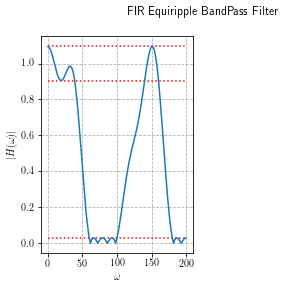

In [ ]:
plt.subplot(1,2,1)
plt.plot(w,abs(h))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(\omega)|$')
plt.hlines(10**(-stop_ripple_db/20), 0, Omega_s/2, 'r', 'dotted')
plt.hlines(1+10**(-pass_ripple_db/20), 0, Omega_s/2, 'r', 'dotted')
plt.hlines(1-10**(-pass_ripple_db/20), 0, Omega_s/2, 'r', 'dotted')
plt.grid(linestyle='dashed')
plt.suptitle('FIR Equiripple BandPass Filter')

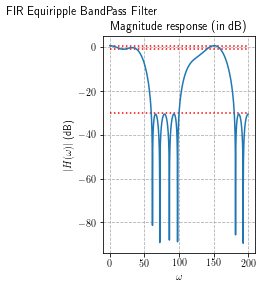

In [ ]:
plt.subplot(1,2,2)
plt.plot(w,mag_response)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(\omega)|$ (dB)')
plt.hlines(-stop_ripple_db, 0, Omega_s/2, 'r', 'dotted')
plt.hlines(20*math.log10(1+10**(-pass_ripple_db/20)), 0, Omega_s/2, 'r', 'dotted')
plt.hlines(20*math.log10(1-10**(-pass_ripple_db/20)), 0, Omega_s/2, 'r', 'dotted')
plt.title('Magnitude response (in dB)')
plt.grid(linestyle='dashed')

plt.suptitle('FIR Equiripple BandPass Filter')
plt.show()

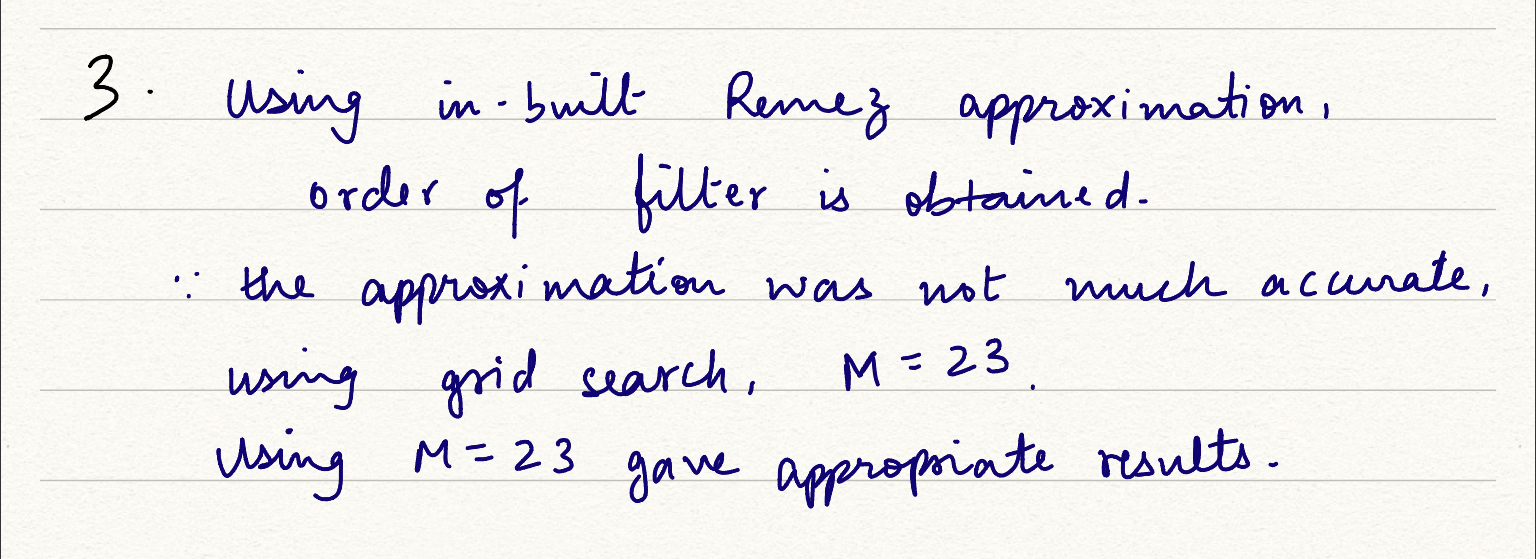